<b>Son değiştirilme tarihi:16.10.2021</b>

<b>ÖNSÖZ</b>

NOT:Dokümanda zaman zaman güncellemeler olacağı için arada bir güncel versiyon kontrolü yapmanızı tavsiye ederim.

"nbviewer" üzerinden görüntülüyorsanız, dosyayı kaydetmek için sayfanın sağ üst köşesindeki download butonuna tıklayın, açılan sayfada herhangi bir yere sağ tıklayın ve farklı kaydet diyerek dosyayı istediğiniz klasöre kaydedin. Dosyayı açabilmek için Jupyter'in kurulması gerekmekte olup, yeni başlayan biriyseniz aşağıda kurulumla ilgili detayları inceleyin.

Daha önce ana dokümanın bir parçası olan Numpy ve Pandas kütüphanelerinin detaylarına <a href="https://nbviewer.org/github/VolkiTheDreamer/PythonRocks/blob/master/Python%20ile%20Veri%20Analizi%20-%20Numpy%20ve%20Pandas.ipynb">buradan</a> ulaşabilirsiniz.
<hr>

In [1]:
#Gerekli kütüphaneleri import ederek başlıyoruz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from utility import * #Bu dosyanın bulunduğu github repositorysinden utility.py doyasını indirmiş olmanız gerekiyor

os.chdir(r"E:\OneDrive\Dökümanlar\GitHub\dataset") #sizde uygun olan klasör neresiyse orayı yazın

# POKEMON data temini

Bu veri setini tekrar indiriyoruz.

In [236]:
# burdan itibaren yeni veri setimizle çalışacağız
dfp=pd.read_csv("https://raw.githubusercontent.com/VolkiTheDreamer/dataset/master/Classification/pokemon.csv",usecols=list(range(1,12))) #1-11 kolonlarını alıyoruz, ilk kolon gereksiz
dfp.head()

Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
0      Bulbasaur  Grass  Poison  45      49       49       65       65     45   
1        Ivysaur  Grass  Poison  60      62       63       80       80     60   
2       Venusaur  Grass  Poison  80      82       83      100      100     80   
3  Mega Venusaur  Grass  Poison  80     100      123      122      120     80   
4     Charmander   Fire     NaN  39      52       43       60       50     65   

   Generation  Legendary  
0           1      False  
1           1      False  
2           1      False  
3           1      False  
4           1      False

Görsel olmayan analizleri zaten yapmıştık, tekrar yapmıyoruz. Doğrudan göreselleştirmeye geçiyoruz.

# Görselleştirme

Takdir edersiniz ki burada, tüm grafik türlerini göremeyeceksiniz. Ayrıca gördüğünüz grafiklerin her parametresini de göremeyeceksiniz. Bunun için sizin biraz ellerinizi kirletmeniz gerekebilir. Neyseki, internette bol miktarda kaynak bulunuyor.

## Matplotlib

### Giriş

In [280]:
%%javascript
//Bu javascript kodu ile, bazı grafikler hücreye tam sığmadığnda scroll yapma durumundan kurtarmaktadır.
//bu özelliği iptal etmek isterseniz false yerine true yazıp tekrar çalıştırın
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [281]:
plt.rcParams["figure.figsize"] = (5,3) #default figure(canvas) boyutu ayarı yapıyoruz

In [282]:
%matplotlib inline
#grafiklerin kodumuzdan hemen sonra çıkması ve notebookun bir parçası olması için

***Grafikleri 3 türlü çizebiliriz:***

* pandasın plot metodu ile, ki bu aslında plt(pyplot) nesnesi için bir wrapper metoddur. (Basit grafikler için kullanışlıdır, kullanımı sınırlıdır)
* plt(pyplot) nesnesi ile. Çoğu durumda bu yeterli olacak, zaten bu modül arka planda Ax nesnesinin metodlarını çağırmakta. Örneğin plt.xlim yazdığınızda aslında sahne arkasında ax.set_xlim() metodu çağrılır. Basit çizimler için bu yöntem tercih edilir, zira daha sadedir.
* plt ile figure nesnesi yaratıp object oriented giderek(advanced)

(0.5, 4.5)

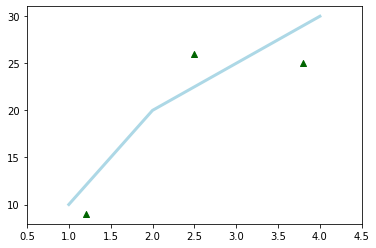

In [283]:
#ax nesnesi ile, 3.yöntem
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
ax.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
ax.set_xlim(0.5, 4.5)
plt.show()

(0.5, 4.5)

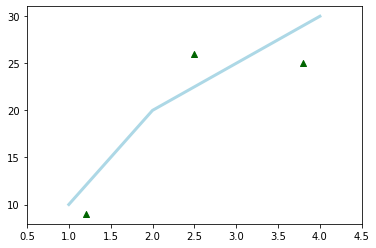

In [284]:
#2.yöntem daha sade. figure ve axes otomatik yaratılır
plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
plt.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
plt.xlim(0.5, 4.5)
plt.show()

***x,y ve data parametreleri hakkında bir not***

Grafiklerin x ve y eksen bilgilerini farklı şekillerde belirtebiliyoruz. Çeşitli örnekler şöyle verilebilir:

* Bir dataframein kolonu üzerinden işlem yaptığımız için hiç parametre vermeksizin(x ekseni için otomatikman index kullanılır). Ör:df["kolon"].plot()
* sadece x ekseni için parametre, y için height parametresini. Ör:plt.bar(x=dfp["Name"].iloc[:50],height=dfp["Speed"].iloc[:50])
* sadece y parametresini(x ekseni için otomatikman index kullanılır) 
* xticks/yticks ile sonradan belirleme. Ör:plt.xticks(np.arange(50), dfp["Name"].iloc[:50]))
* data parametresine ilgili dataframe'i verip x ve y için kolon isimlerini. Ör:dfp.head(50).plot(kind="bar",x="Name",y="Speed",figsize=(20,5))

Detaylı örnekleri ise aşağıda bulacaksınız.

***Diğer parametreler hakkında bir not***

Her parametre her zaman kullanılabilir durumda olmayabilmekte, seçilen grafiğin türüne göre bazı parametreler kullanılabilir hale gelmektedir.

#### pandas'ın plot metodu ile

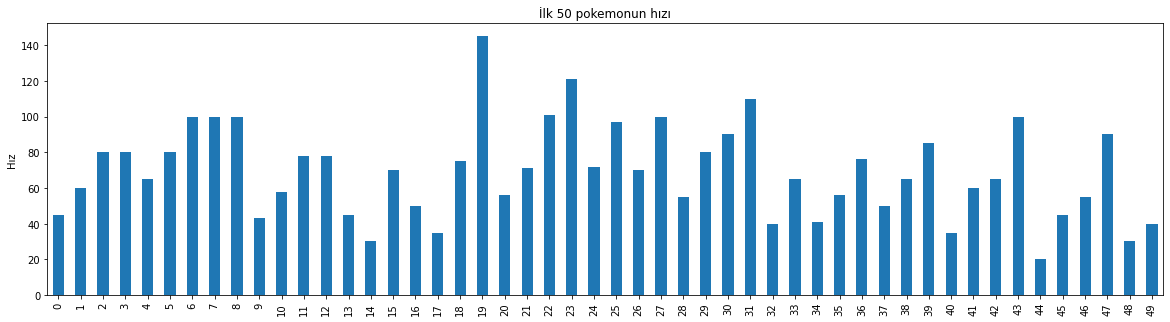

In [285]:
dfp["Speed"].iloc[:50].plot(kind="bar",figsize=(20,5)) #default tür line'dır. bu sırada plt nesnesi oluşur
plt.title("İlk 50 pokemonun hızı")
plt.ylabel("Hız")
plt.show();

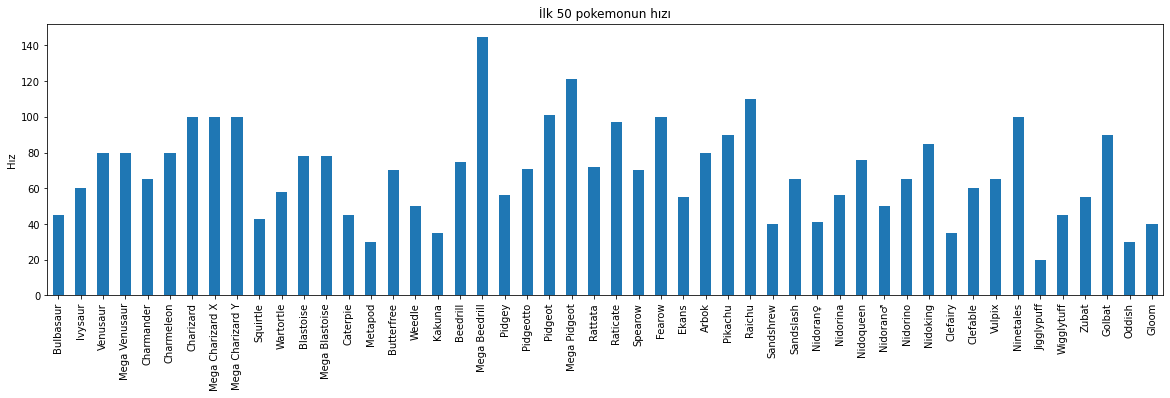

In [286]:
#bir kolona uygulanıyorsa X eksenini belirtmek için plt.xticks uygulanır, aksi halde yukarıdaki gibi indeksler görünür
dfp["Speed"].iloc[:50].plot(kind="bar",figsize=(20,5)) #default tür line'dır. bu sırada plt nesnesi oluşur
plt.xticks(np.arange(50), dfp["Name"].iloc[:50])
plt.title("İlk 50 pokemonun hızı")
plt.ylabel("Hız")
plt.show();

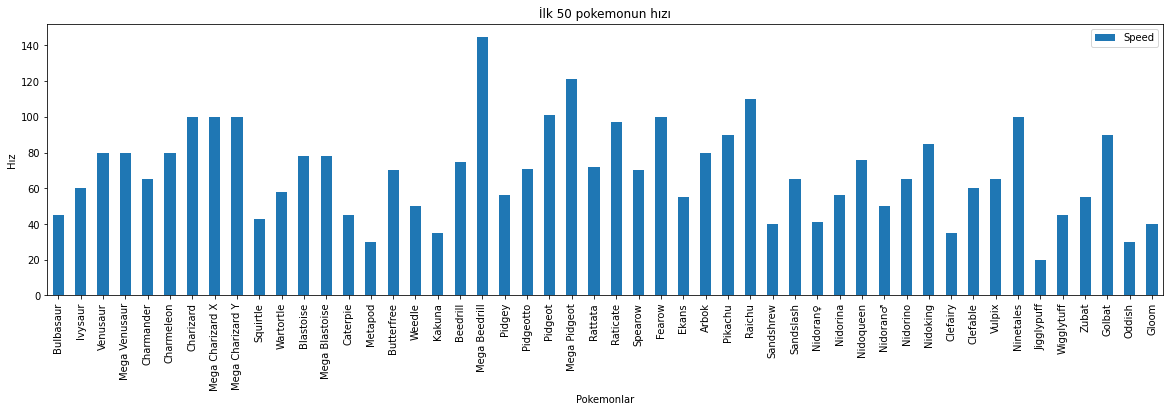

In [287]:
#veya tüm dfp üzerine uygulayıp x ve y'yi ayrıca belirtiriz
dfp.head(50).plot(kind="bar",x="Name",y="Speed",figsize=(20,5)) #grafiği bu satır çizer ve bu sırada bir plt nesnesi oluşur
plt.title("İlk 50 pokemonun hızı") #ancak diğer özellikler için, bir üstte oluşan plt'nin metodlarını çağırıyoruz
plt.xlabel("Pokemonlar")
plt.ylabel("Hız")
plt.show();

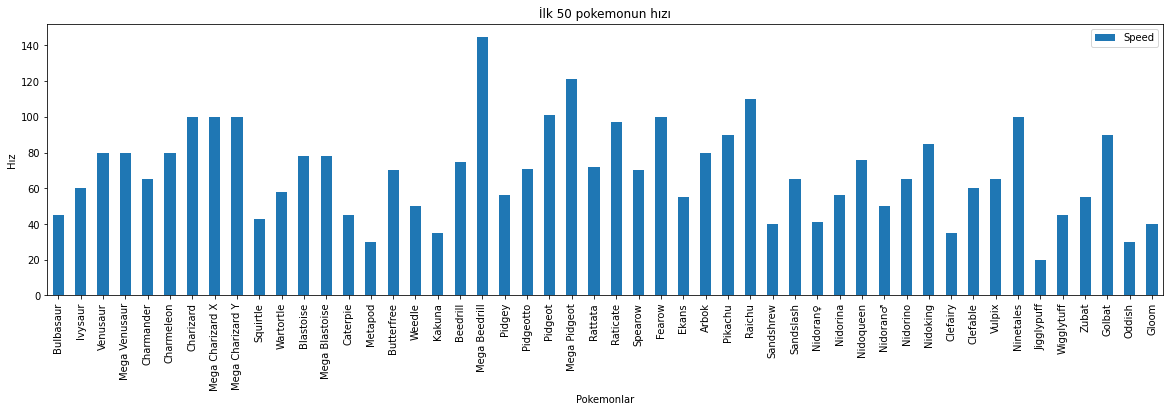

In [288]:
#veya zincirileme şekilde
dfp.head(50).plot.bar(x="Name",y="Speed",figsize=(20,5)) #grafiği bu satır çizer ve bu sırada bir plt nesnesi oluşur
plt.title("İlk 50 pokemonun hızı") #ancak diğer özellikler için, bir üstte oluşan plt'nin metodlarını çağırıyoruz
plt.xlabel("Pokemonlar")
plt.ylabel("Hız")
plt.show();

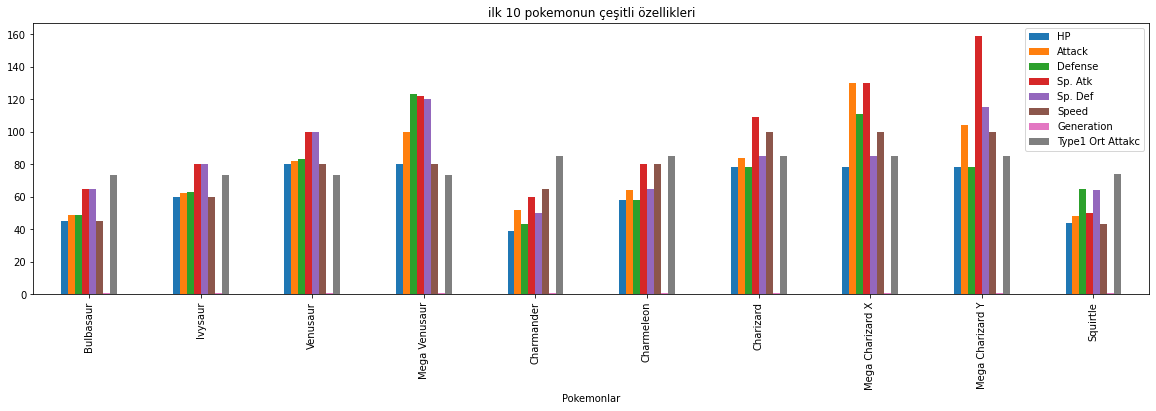

In [289]:
#y belirtmezsek tüm featurelar için çizer
dfp.head(10).plot.bar(x="Name",figsize=(20,5)) #grafiği bu satır çizer ve bu sırada bir plt nesnesi oluşur
plt.title("ilk 10 pokemonun çeşitli özellikleri")
plt.xlabel("Pokemonlar")
plt.show();

***Subplot*** 

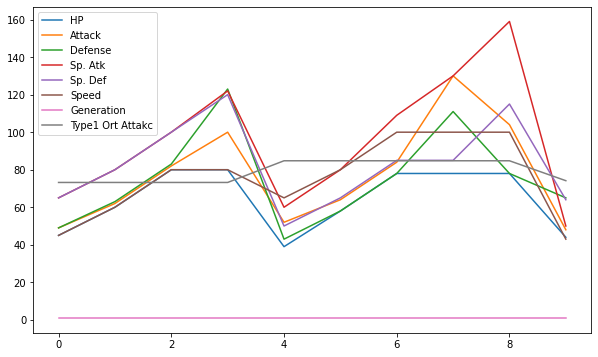

In [290]:
#tümünü tek grafikte göstermek karışık bir görüntüye sebep verir
dfp.head(10).plot(figsize=(10, 6))
plt.show();

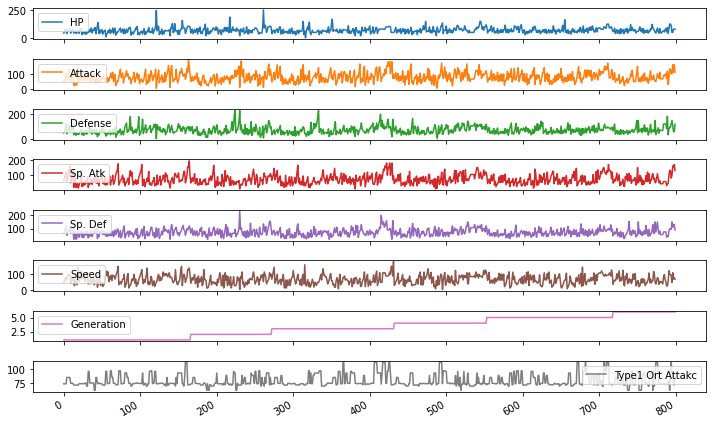

In [291]:
#subplot ile daha anlaşılır bir görüntü
dfp.plot(subplots=True, figsize=(10, 6))
plt.tight_layout() #grafikler içiçe girmesin, kargacık burgacık görünmesin
plt.show();

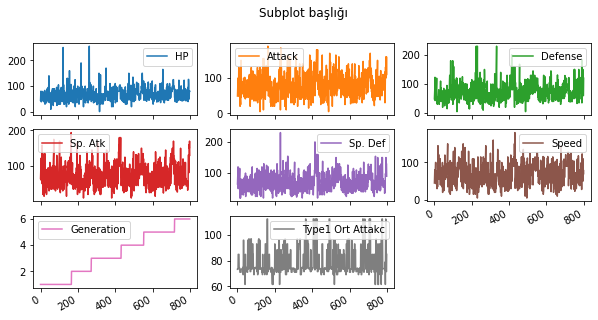

In [292]:
#layout girilerek matrisyel bir görünüm sağlanabilir
dfp.plot(subplots=True, layout=(3,3), figsize=(10, 5)) #4,2 veya 2,4 tam olur, 3,3te bi boş yer kalıyor
plt.suptitle("Subplot başlığı") #tüm grafikleri temsile eden üst başlık(super title)
plt.show();

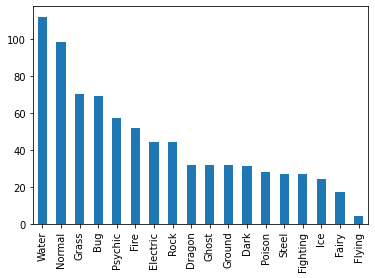

In [293]:
#yukarıdaki örneklerde, hep bir kolon üzerinden gittik, kolon verdiğimiz için bunlar y eksenini adresliyordu. x ekseni
#için bizim ayrıca parametre vermemiz gerekti,aksi halde indeks değerleri görünüyordy.Şimdi ise yine bir Seriyi çizdireceğiz
#ve yine x eksenini belirtemeyeceğiz, ancak bu sefer indeksler farklı olacak, sayılar değil Type 1 isimleri.
dfp["Type 1"].value_counts().plot(kind="bar")
plt.show();

#### pyplot(plt) nesnesi ile

Yukarıdaki belirttiğimiz gibi, bu yöntemle çalışırken arka planda ya yeni bir Figure/Axes ikilisi oluşmakta veya, mevcuttaki bir Figure/Axes ile çalışılmaktadır. object oriented kısımda göreceğimiz gibi ax nesnesinin tüm setter ve getter metodlarının plt içinde bir karşılığı vardır. Ör: ax.set_title() için plt.title(). Bu konuda çok detaylı ve anlaşılır açıklamaları https://realpython.com/python-matplotlib-guide/ safyasında bulabilirsiniz.

Grafik türlerini kendi ismine ait metodla çizdiriyoruz.

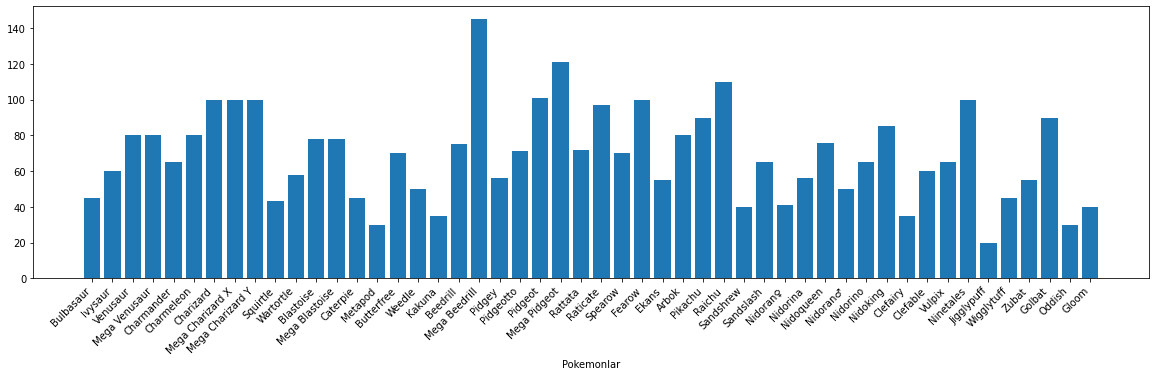

In [294]:
plt.figure(figsize=(20,5))
plt.bar(x=dfp["Name"].iloc[:50],height=dfp["Speed"].iloc[:50]) #bar plot
plt.xlabel("Pokemonlar")
plt.xticks(rotation= 45,horizontalalignment="right")
plt.show();

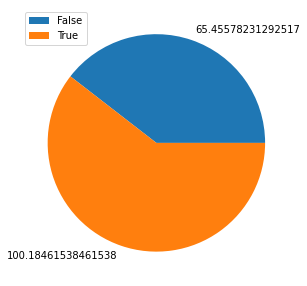

In [295]:
plt.figure(figsize=(20,5))
grup=dfp.groupby("Legendary")
plt.pie(x=grup["Speed"].mean(),labels=grup["Speed"].mean())
plt.legend(grup.groups.keys(),loc='upper left')
plt.show();

#### figure ile object oriented

##### Matplotlib nesne modeli, nesne hiyerarşisi

Nesne hiyerarşisini sözel anlatmaya geçmeden önce https://realpython.com/python-matplotlib-guide/ sayfasından aldığım şu görseli ve https://matplotlib.org/examples/showcase/anatomy.html  sayfasından aldığım bir alttaki görseli inceleyelim. İlk linkteki sayfa nesne modeli hakkında çok faydalı(teknik ve teorik) bilgiler vermekte, ilgisi olanlar inceleyebilir.

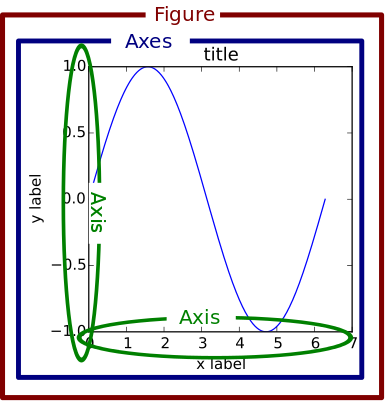

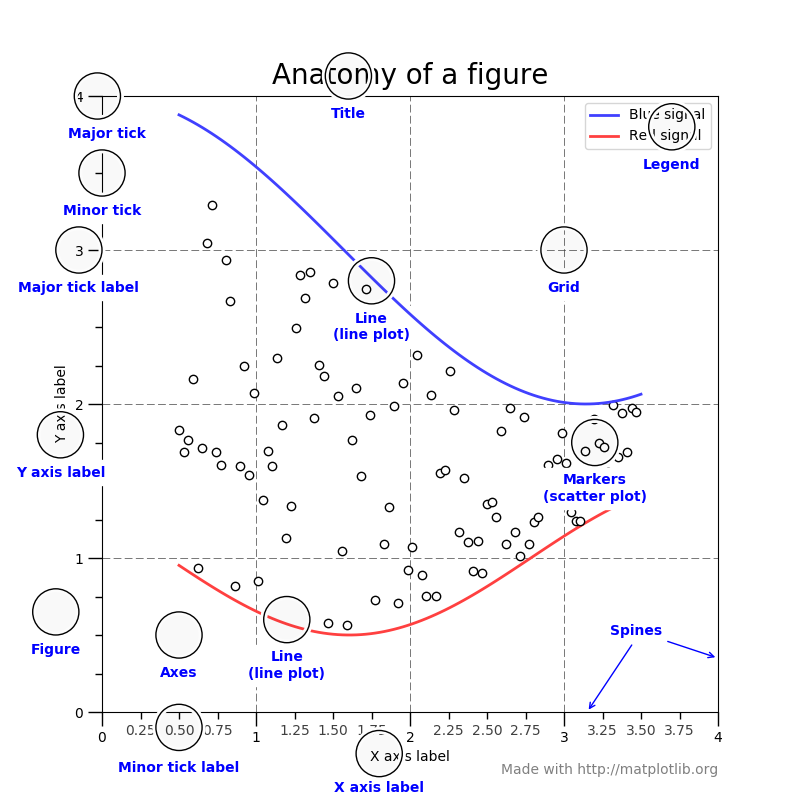

Bu son yöntemin güzelliği şu, figure nesnesi üzerinde tam kontrolümüz bulunur.

<b>Figure nesnesi:</b> Bu, grafiğin üzerinde duracağı canvastır, grafiğin taşıyıcısı olarak düşünülebilir.<br>
<b>Ax nesnesi:</b> Bu ise, grafiğin kendisidir. Figure içine ilk bu eklenir.

***eksenler hakkında***

Her Ax nesnesinin bir x ekseni(axis) bir de y ekseni bulunur, bunlar tick'leri içerir ve bunlar da major/minor tickline'lar ile ticklabellara sahiptir. 

Yani şöyle bir hiyerarşiden bahsedeviliriz: 

<pre><b>figure > ax(es) > axis > tick > tickline + ticklabel
                       > axislabel
                       > title
                       > legend
</b></pre>

##### add_axes metodu 

Bu yöntemde grafik(axes) canvas üzerinde "mutlak" koordinatlara konumlandırılır.

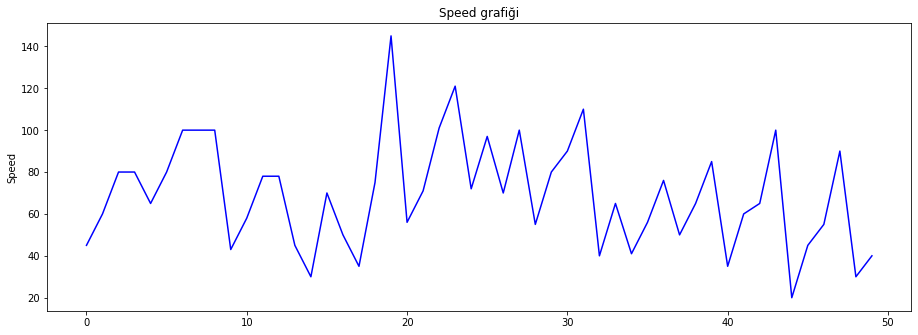

In [296]:
# boş bir canvas(figure) yaratalım
fig = plt.figure(figsize=(15,5))

# bu canvasa grafik nesnesini(axes ya da plot) yerleştirelim 
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # sırayla sol, alt, genişlik, yükseklik

# grafiği çizdirelim
axes.plot(np.arange(50), dfp["Speed"].iloc[:50], c='b')
axes.set_ylabel('Speed')
axes.set_title('Speed grafiği')
plt.show();

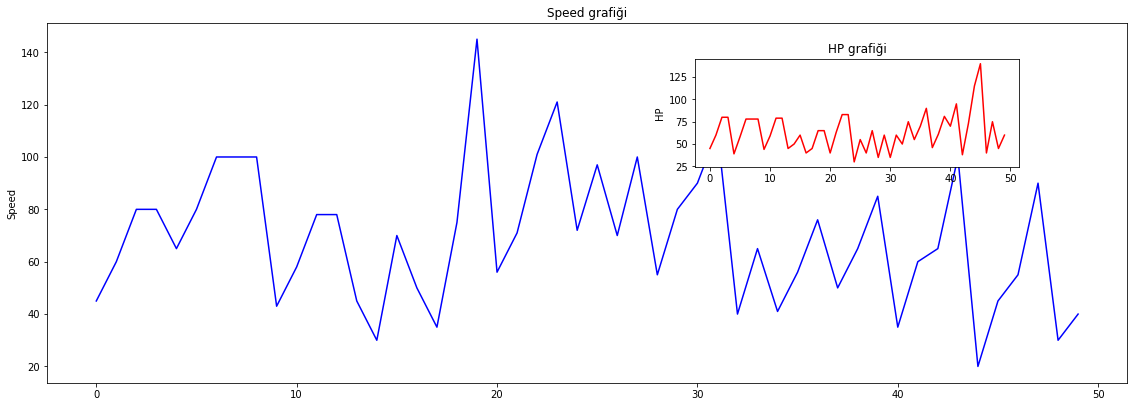

In [297]:
#Şimdi bu figure içine ikinci bir iç grafik yerleştirebiliriz
fig = plt.figure(figsize=(15,5))

axes1 = fig.add_axes([0.1, 0.1, 1, 1]) # ana axes
axes2 = fig.add_axes([0.7, 0.7, 0.3, 0.3]) # iç axes

axes1.plot(np.arange(50), dfp["Speed"].iloc[:50], 'b')
axes1.set_ylabel('Speed')
axes1.set_title('Speed grafiği')

axes2.plot(np.arange(50), dfp["HP"].iloc[:50], 'r')
axes2.set_ylabel('HP')
axes2.set_title('HP grafiği');

Görüldüğü üzere, bu yöntemde grafiklerin sabit konumları belirtilebildiği için, içiçe grafik gösterme durumlarında en uygun çözüm olmaktadır. Bunun dışında pratikte daha çok bir alttaki yöntem kullanılmaktadır.

##### add_subplot

Bunda ise bir grid tasarlayıp, bu gridin hangi bölgesine hangi grafiği yerleştireceğimizi belirtiyoruz. Örneğin ilk 2*2'lik bir matrisin sol üstü(1 numaralı) gibi

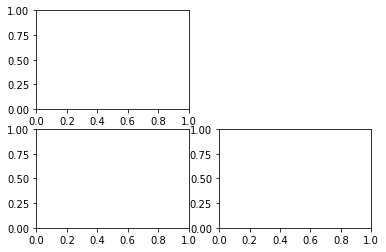

In [298]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1) #veya kısaca add_subplot(221)--> 2x2'lik matrisin 1 numaralı gözüne yerleşir
#ax2 = fig.add_subplot(2, 2, 2) 
ax3 = fig.add_subplot(2, 2, 3) #--> 2x2'lik matrisin 3 numaralı gözüne yerleşir
ax4 = fig.add_subplot(224)

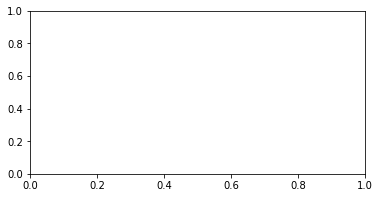

In [299]:
#yukarıdaki önce figure oluşturup sonra add_subplot diyorduk. bunun tek satıra indirgenmiş hali
fig, ax = plt.subplots(figsize=(6,3)) #tek ax

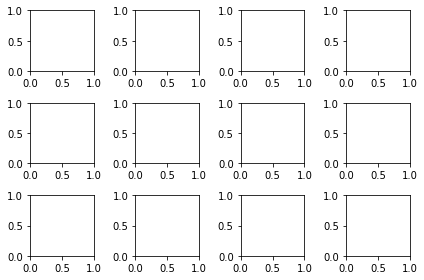

In [300]:
#gridli
fig, axes = plt.subplots(nrows=3, ncols=4) #axes'lere dizi gibi ulaşabilirsin axes[0,1] gibi
plt.tight_layout()

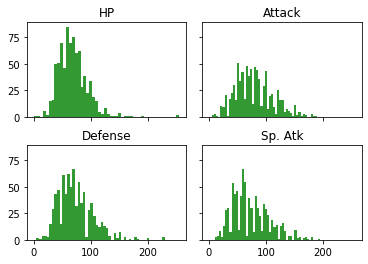

In [301]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True) #eksen etiketleri tekrar etmesin diye son iki parametre
k=0
for i in range(2):
    for j in range(2):
        axes[i, j].hist(dfp.iloc[:,k+3], bins=50, color='g', alpha=0.8) #HP, Attack, Defense, Sp.Atk
        axes[i, j].set_title(dfp.columns[k+3])
        k+=1
plt.subplots_adjust(wspace=0.1, hspace=0.3);

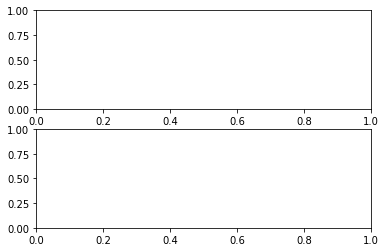

In [302]:
#yukarıdaki yöntemin bir de aşağıdaki hali var. Bunu da görün istedim ama yukarıdakini tercih edin.
fig = plt.figure() # create the canvas for plotting
ax1 = plt.subplot(2,1,1) 
# (2,1,1) indicates total number of rows, columns, and figure number respectively
ax2 = plt.subplot(2,1,2)

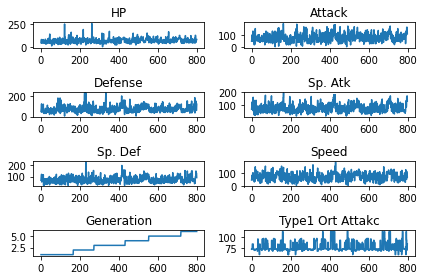

In [303]:
#başka bir örnek
_, axes=plt.subplots(nrows=4,ncols=2)
axes_list = [item for sublist in axes for item in sublist] 

for k,v in dict(enumerate(axes_list)).items():
    kolonad=dfp.select_dtypes(np.number).columns[k]
    dfp[kolonad].plot(ax=v)
    v.set_title(kolonad)

plt.tight_layout()
plt.show();

### Farklı bar chart örnekleri

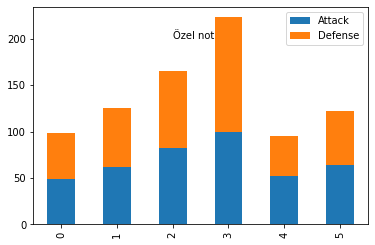

In [304]:
dfp.loc[:5,"Attack":"Defense"].plot.bar(stacked=True) #grafik türü bar olunca stacked parametresi var oluyor
plt.annotate(xy=[2,200], text="Özel not") #grafiğin belirli bir noktasına not koyabiliyoruz
plt.show();

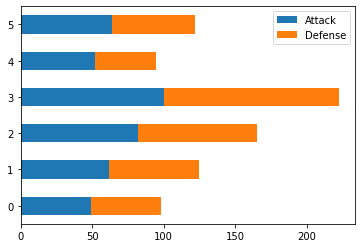

In [305]:
dfp.loc[:5,"Attack":"Defense"].plot(kind="barh",stacked=True) #diğer yöntemle de olur, bu arada yatay bar için barh
plt.show();

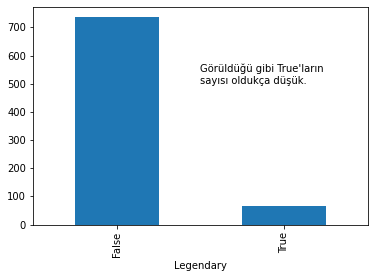

In [306]:
#count plot
dfp.groupby('Legendary')['HP'].count().plot(kind='bar') #sns.countplot alternatifi.herhangi bir kolona göre count alınabilir
plt.annotate(xy=[0.5,500], text="Görüldüğü gibi True'ların \nsayısı oldukça düşük.")
plt.show();

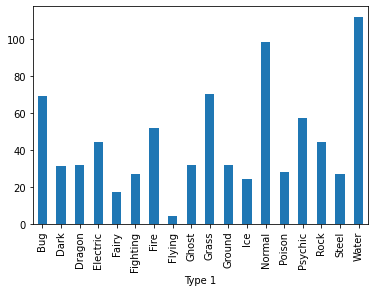

In [307]:
#bir kolona göre gruplayıp adetleri çizme
dfp.groupby("Type 1").size().plot(kind="bar")
plt.show();

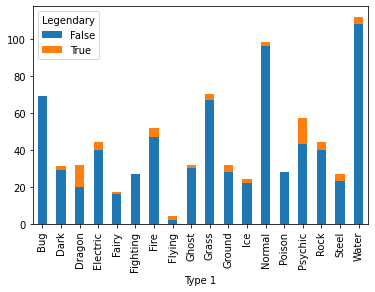

In [308]:
#Bir kolona göre gruplayıp başka bir kolondaki kategorileri stack grafik yapma: önce unstack,sonra stacked chart 
dfp.groupby(['Type 1','Legendary']).size().unstack().plot(kind='bar',stacked=True)
plt.show();

### Pie chart 

<AxesSubplot:ylabel='Speed'>

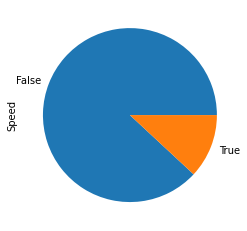

In [309]:
dfp.groupby("Legendary")["Speed"].sum().plot.pie()
plt.show()

### Scatter chart

özellikle korelasyon görmek için faydalı bir grafik türüdür

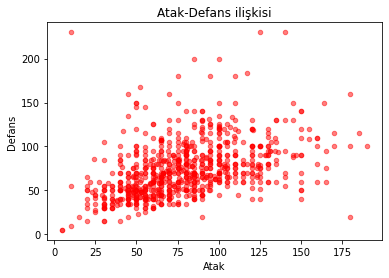

In [310]:
#x=attack, y=defense, ikisi arasındaki korelasyonu gösterecek
dfp.plot(kind="scatter",x="Attack", y="Defense", color="r",alpha=0.5)
plt.xlabel("Atak")
plt.ylabel("Defans")
plt.title("Atak-Defans ilişkisi")

plt.show();

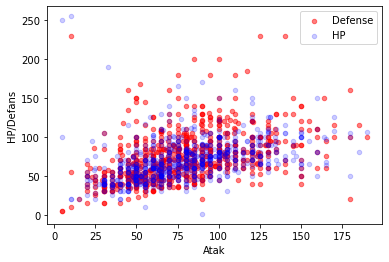

In [311]:
#aynı chart içine başka bir dağılım yerleştirebiliriz, bunun için ax parametresine ilk grafiği atamak yeterlidir
#bu yöntem add_axes/add_subplot  yönteminden farklıdır. Burada aynı ax içine ikinci bir plot çizilmektedir
c1=dfp.plot(kind="scatter",x="Attack", y="Defense", color="r",alpha=0.5)
dfp.plot.scatter(x="Attack", y="HP", color="b",alpha=0.2,ax=c1)

plt.xlabel("Atak")
plt.ylabel("HP/Defans")
plt.legend(["Defense","HP"],loc="best")
plt.show();

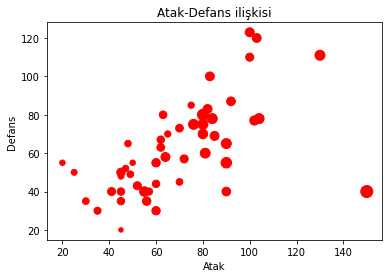

In [312]:
#s parametresi ile bubblechart. 
d=dfp.iloc[:50,:]
d.plot(kind="scatter",x="Attack", y="Defense", color="r",s=d["Speed"]) #Speed değerlerine göre
plt.xlabel("Atak")
plt.ylabel("Defans")
plt.title("Atak-Defans ilişkisi")

plt.show();

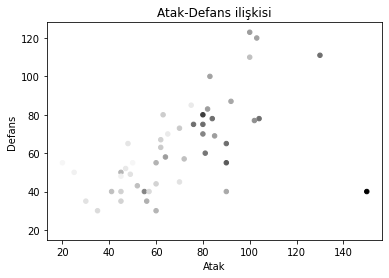

In [313]:
#color parametresine bir kolonu atayarak renk yoğunluğundan anlam çıkarma
d=dfp.iloc[:50,:]
d.plot(kind="scatter",x="Attack", y="Defense", color=d["Speed"]) #Speed değerlerine göre
plt.xlabel("Atak")
plt.ylabel("Defans")
plt.title("Atak-Defans ilişkisi")

plt.show();

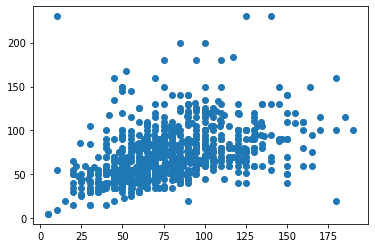

In [314]:
#veya doğrudan plt nesnesi ile
plt.scatter(x=dfp["Attack"], y=dfp["Defense"])

### Histgoram

<AxesSubplot:ylabel='Frequency'>

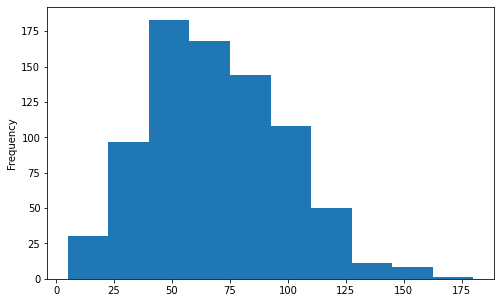

In [315]:
#Histogram for Seri
dfp["Speed"].plot(kind="hist",bins=10,figsize=(8,5))
plt.show()

<AxesSubplot:ylabel='Frequency'>

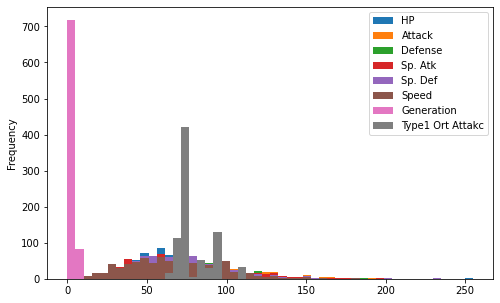

In [316]:
#histogram for DF. Tüm df için histogram çıkarmanın daha güzel yolunu az sonra göreceğiz
dfp.plot(kind="hist",bins=50,figsize=(8,5))
plt.show()

DF.plot.hist() -->plot(kind="hist") ile aynı:DF'nin tüm kolonları için tek bir grafikte histgoramları çizer. tüm kolonlar benzer skladaysa bu faydalı olabilir, aksi halde biraz karmaşık görünebilir.

DF.hist() -->her bir kolon için ayrı bir küçük histogram yapar.

<AxesSubplot:ylabel='Frequency'>

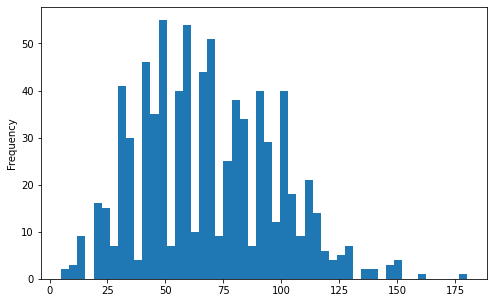

In [317]:
#Seri.plot.hist()
dfp["Speed"].plot.hist(bins=50,figsize=(8,5))
plt.show()

bize hem dağı

<AxesSubplot:>

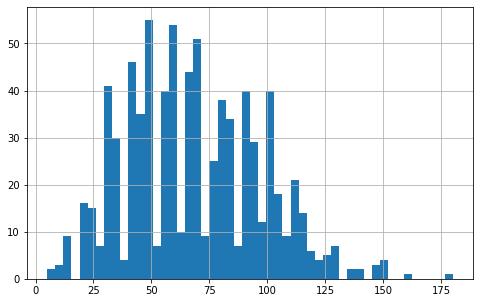

In [318]:
#Seri.hist()
dfp["Speed"].hist(bins=50,figsize=(8,5)) #bunda gridler de görünüyor
plt.show()

<AxesSubplot:ylabel='Frequency'>

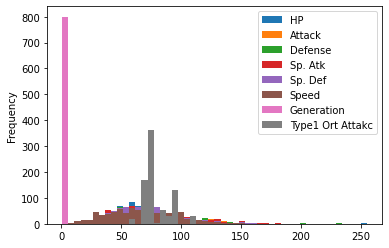

In [319]:
#df.plot.hist()
dfp.select_dtypes(np.number).plot.hist(bins=50)
plt.show()

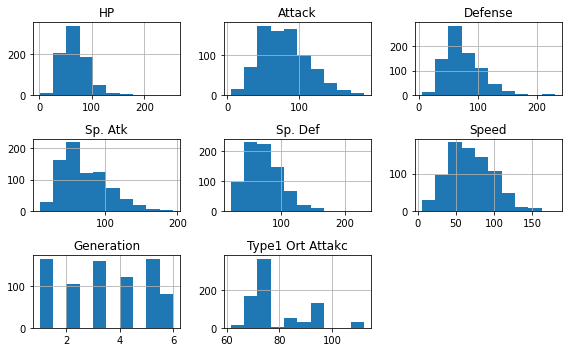

In [320]:
#df.hist()
dfp.select_dtypes(np.number).hist(figsize=(8,5))
plt.tight_layout()
plt.show();

<AxesSubplot:ylabel='Frequency'>

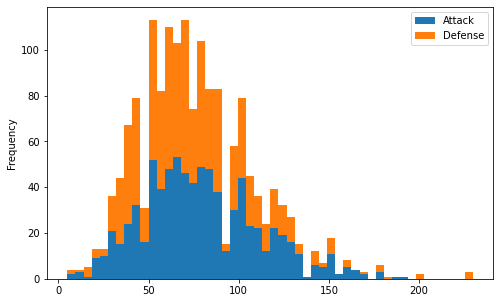

In [321]:
#histogramların da stacked özelliği var
dfp[["Attack","Defense"]].plot.hist(bins=50,stacked=True,figsize=(8,5))
plt.show()

### boxplot

Histogramda outlierları(uç değerler) görebiliyorduk ancak boxplotlar bu amaç için daha uygun, üstelik mediana göre konumlarını da daha rahat görebiliyoruz. Outlierlar için, genelde %10-%90 percentileların dışı veya Q1(lower quartile) ile Q3ten(upper quartile) 1,5 IQR(Q3-Q1) mesafe uzaklıktan itibaren olan noktlar seçilebilmektedir. Pythondaki görselleştirme küptüphaneler genelde 1,5 IQR formülüne göre hareket eder. 

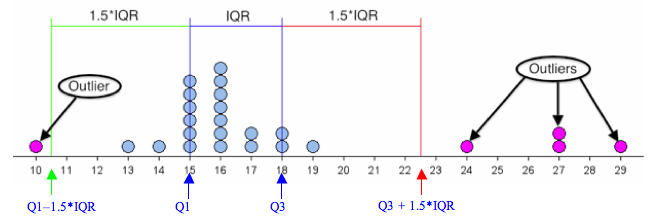

<AxesSubplot:>

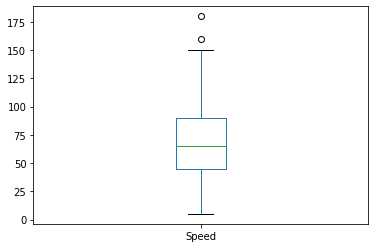

In [322]:
dfp["Speed"].plot.box()
plt.show()
#kutunun üstü Q3ü yani %75 percentili, kutu içindeki çizgi %50yi, kutu altı %25(Q1)i
#kutunun biraz üstündeki çizgi Q3+1.5*IQR değeri verir, en alt çizgi Q1-1.5*IQR'ı verir
#(varsa) yuvarlak halkalar ise outlierları verir

<AxesSubplot:>

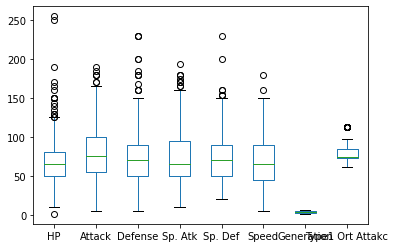

In [323]:
#tüm df
dfp.plot.box()
plt.show()

<AxesSubplot:>

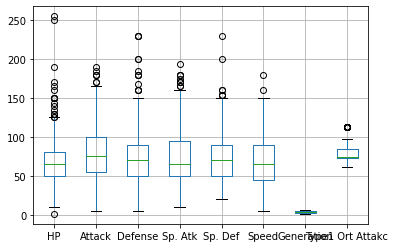

In [324]:
#veya
dfp.select_dtypes(np.number).boxplot()
plt.show()

### yoğunluk analizi(kde)

Histograma göre avantajları olan bir grafik türüdür. detaylar için <a href="https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0">buraya</a> bakabilirsiniz.

<AxesSubplot:ylabel='Density'>

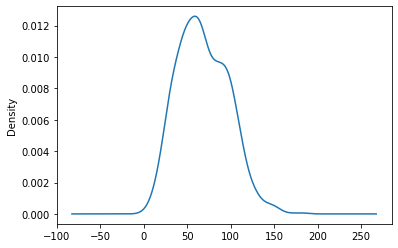

In [325]:
dfp["Speed"].plot.kde()
plt.show()

### pdf(probability density function) ve cdf(cummulative distributive function)

Text(0.5, 0, 'Speed')

pdf: [0.0375  0.12125 0.22875 0.21    0.18    0.135   0.0625  0.01375 0.01
 0.00125]
binler: [  5.   22.5  40.   57.5  75.   92.5 110.  127.5 145.  162.5 180. ]
cdf: [0.0375  0.15875 0.3875  0.5975  0.7775  0.9125  0.975   0.98875 0.99875
 1.     ]


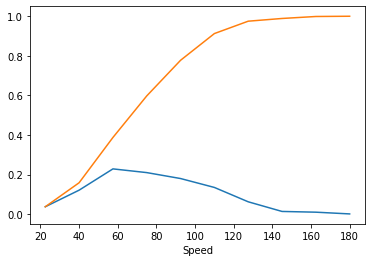

In [326]:
counts, binler=np.histogram(dfp["Speed"],bins=10,density=True)
plt.xlabel("Speed")
pdf=counts/(sum(counts))
print("pdf:",pdf)
print("binler:",binler)

cdf=np.cumsum(pdf)
print("cdf:",cdf)
plt.plot(binler[1:],pdf)
plt.plot(binler[1:],cdf)
plt.show()

### Scatter matrix plot

tüm kolonları birbiriyle scatter grafik yapar

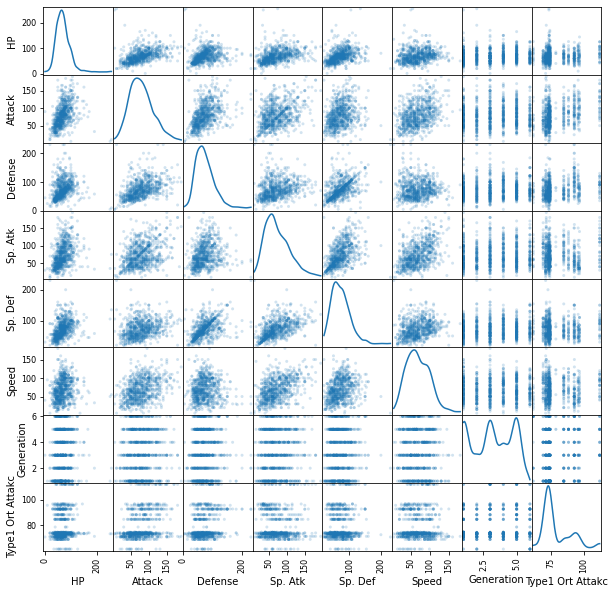

In [327]:
from pandas.plotting import scatter_matrix #diğerlerinden farklı bir 
scatter_matrix(dfp.select_dtypes(np.number), alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show();

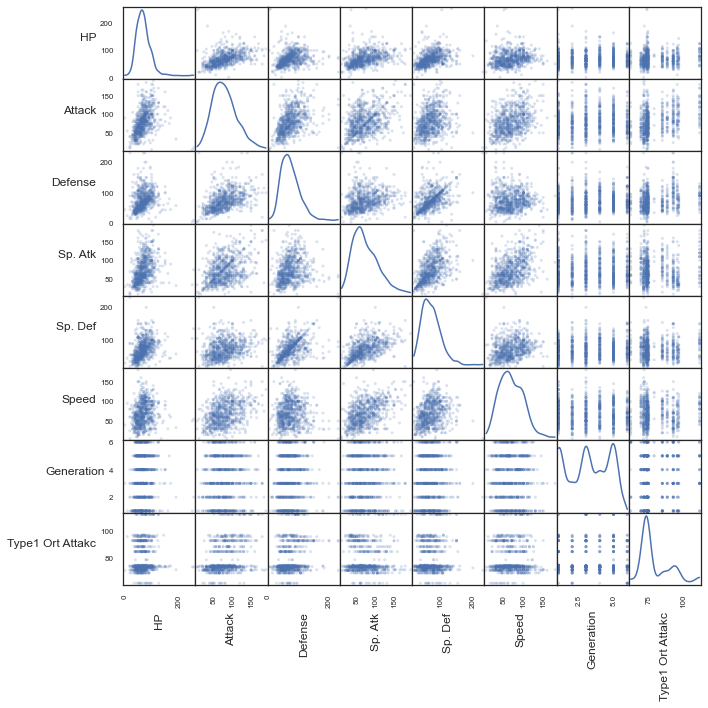

In [433]:
axes=scatter_matrix(dfp.select_dtypes(np.number), alpha=0.2, figsize=(10, 10), diagonal='kde')
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

### Birden fazla grafik çizme

#### Tüm dataframe için grafik çizdirme

Bu yöntemi görmüştük. Çok kalabalık olmayacaksa uygundur.

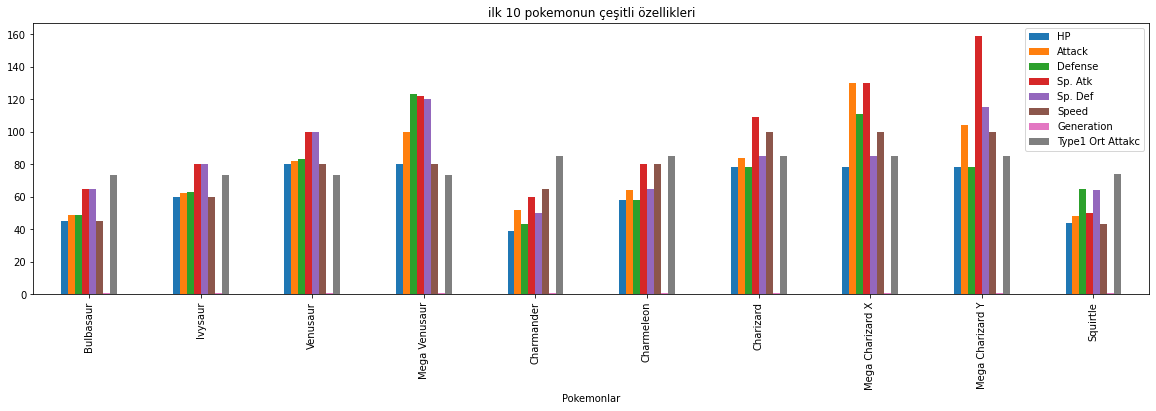

In [328]:
dfp.head(10).plot.bar(x="Name",figsize=(20,5))
plt.title("ilk 10 pokemonun çeşitli özellikleri")
plt.xlabel("Pokemonlar")
plt.show();

#### add_axes yöntemi

Bunun detaylarını yukarıda görmüştük. Bu yöntemle aynı canvas(figure) içine birden çok ax çizilir. Hem y hem x ekseni farklı skalada olan değişkenler için uygundur.

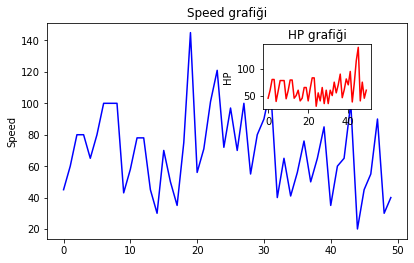

In [329]:
fig = plt.figure(figsize=(5,3))

axes1 = fig.add_axes([0.1, 0.1, 1, 1]) # ana axes
axes2 = fig.add_axes([0.7, 0.7, 0.3, 0.3]) # iç axes

axes1.plot(np.arange(50), dfp["Speed"].iloc[:50], 'b')
axes1.set_ylabel('Speed')
axes1.set_title('Speed grafiği')

axes2.plot(np.arange(50), dfp["HP"].iloc[:50], 'r')
axes2.set_ylabel('HP')
axes2.set_title('HP grafiği');

#### subplot

Bunu da görmüştük. Bu yöntemle de aynı canvas(figure) içine birden çok ax çizilir.

2 ana yöntemi vardır

1-df.plot(subplots=True, layout=(3,2))

2-fig, ax(es)=plt.subplots(3,2)
Llayout parametreleri iki durumda da opsiyoneldir. Belirtilmezlerse tek büyük grafikte gösterim, belirtilirse matris.

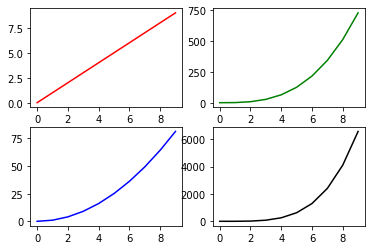

In [330]:
_, axes = plt.subplots(2, 2) #fig hiç kullanılmadığı için _ olarak yazıldı

axes[0, 0].plot(range(10), 'r') #row=0, col=0
axes[1, 0].plot([x**2 for x in range(10)], 'b') #row=1, col=0
axes[0, 1].plot([x**3 for x in range(10)], 'g') #row=0, col=1
axes[1, 1].plot([x**4 for x in range(10)], 'k') #row=1, col=1
plt.show();

**ÖNEMLİ**: Eğer tek satırda yanyana gösterim yapacsaksanız axes'i tek boyutla kullanın. axes[0] gibi. axes[0,0] derseniz hata verir.

#### ax paylaşma

Bu yöntemde tek canvas ve tek ax vardır. hem x hem y eksenleri aynıdır. Benzer değişkenler için kullanımı uygundur.

<AxesSubplot:xlabel='Yıllar'>

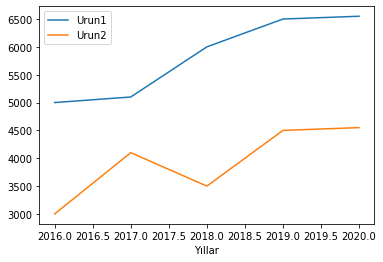

In [331]:
dict_={"Yıllar":[2016,2017,2018,2019,2020],
      "Cirolar":[5000,5100,6000,6500,6550]
      }
dftarihsel=pd.DataFrame(dict_)
c1=dftarihsel.plot(x="Yıllar",y="Cirolar",label="Urun1")

dict2={"Yıllar":[2016,2017,2018,2019,2020],
      "Cirolar":[3000,4100,3500,4500,4550]
      }
dftarihsel2=pd.DataFrame(dict2)
dftarihsel2.plot(x="Yıllar",y="Cirolar",ax=c1,label="Urun2")
plt.show()

#### subplot2grid 

Bu yöntemle aynı canvas(figure) içine birden çok ax çizilir. Subplottan farkı, ax'ların boyutlarını belirleyebilmemiz.

Text(0.5, 1.0, 'square')

Text(0.5, 1.0, 'exp')

Text(0.5, 1.0, 'log')

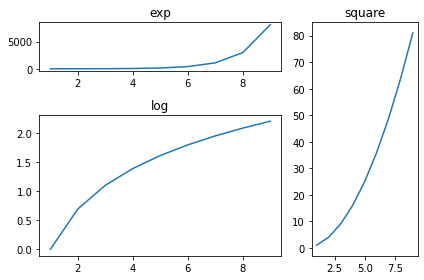

In [332]:
a1 = plt.subplot2grid((3,3),(0,0),colspan = 2)
a2 = plt.subplot2grid((3,3),(0,2), rowspan = 3)
a3 = plt.subplot2grid((3,3),(1,0),rowspan = 2, colspan = 2)
import numpy as np
x = np.arange(1,10)
a2.plot(x, x*x)
a2.set_title('square')
a1.plot(x, np.exp(x))
a1.set_title('exp')
a3.plot(x, np.log(x))
a3.set_title('log')
plt.tight_layout()
plt.show()

#### iki eksenli grafik

Bu yöntemde aynı ax içine y eksenleri farklı iki grafik çizilir. X ekseni aynı, y ekseni farklı skalada olan değişkenler için uygundur.

<AxesSubplot:>

<AxesSubplot:label='e2a2fdd2-ce95-4a31-827b-985e2c2cb0b2'>

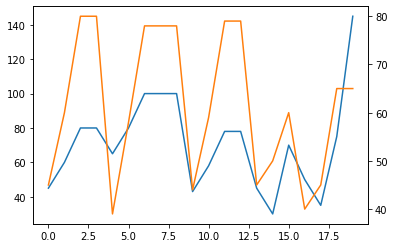

In [333]:
#sadece iki line chart olacaksa ve bi seri üzerine uygulacayaksak en basit hali şöyle
dfp["Speed"].head(20).plot()
dfp["HP"].head(20).plot(secondary_y=True)
plt.show()

Text(0.5, 0, 'İsimler')

Text(0, 0.5, 'Maaşlar')

<BarContainer object of 7 artists>

Text(0, 0.5, 'Yaşlar')

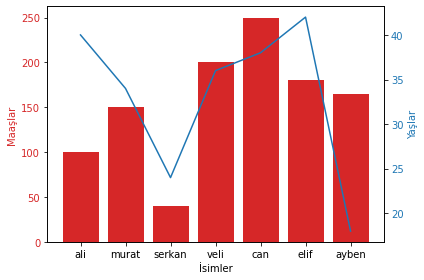

In [334]:
#daha komplike ama her tür durum için olan çözüm şöyle
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('İsimler')
ax1.set_ylabel('Maaşlar', color=color)
ax1.bar(df.Isimler, df.Maaslar, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('Yaşlar', color=color) 
ax2.plot(df.Isimler, df.Yaslar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.show()

Text(0.5, 0, 'Type 1ler')

Text(0, 0.5, 'HP mean')

<BarContainer object of 18 artists>

Text(0, 0.5, 'HP count')

<BarContainer object of 18 artists>

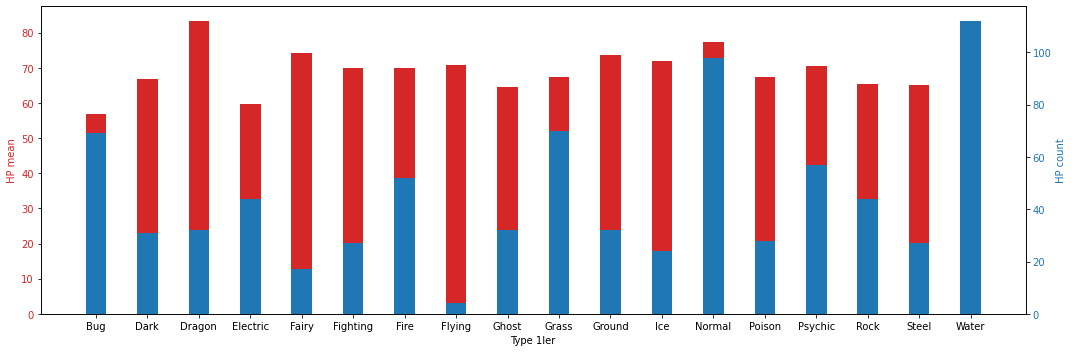

In [335]:
fig, ax1 = plt.subplots(figsize=(15,5))
data=dfp.groupby("Type 1")["HP"].agg(["mean","count"])

color = 'tab:red'
ax1.set_xlabel('Type 1ler')
ax1.set_ylabel('HP mean', color=color)
ax1.bar(x=data.index, height=data["mean"], color=color, width=0.4)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('HP count', color=color) 
ax2.bar(x=data.index, height=data["count"], color=color, width=0.4)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.show()

### Diğer hususlar

#### output cell'deki matplotlib açıklamlalarını gizleme

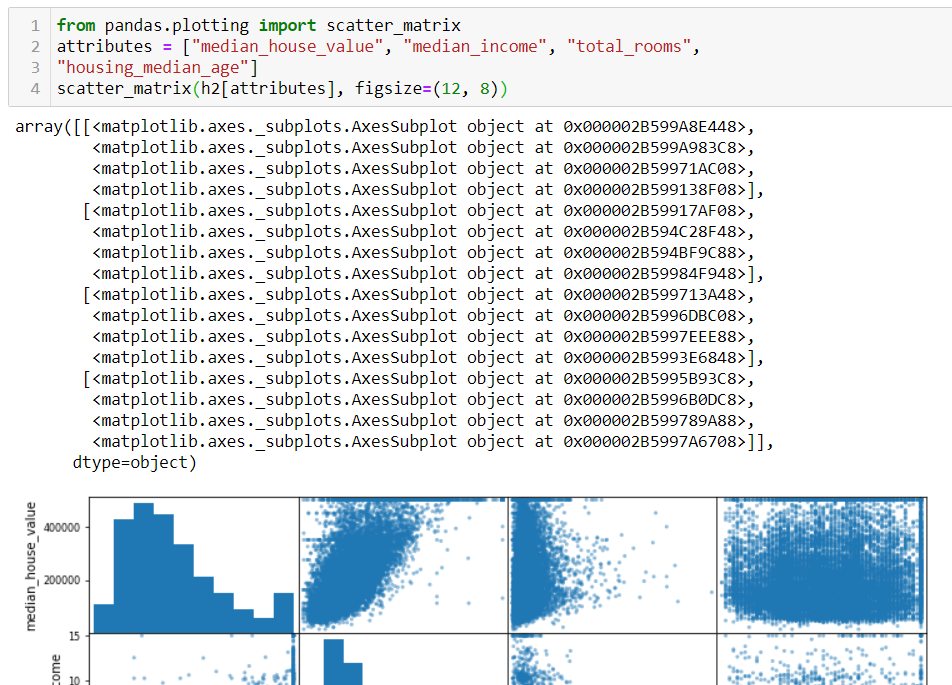

grafik satırının sonuna ";" koymanız yeterlidir.

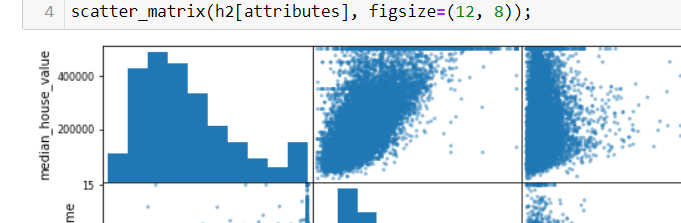

#### Yoğunluk belirtme

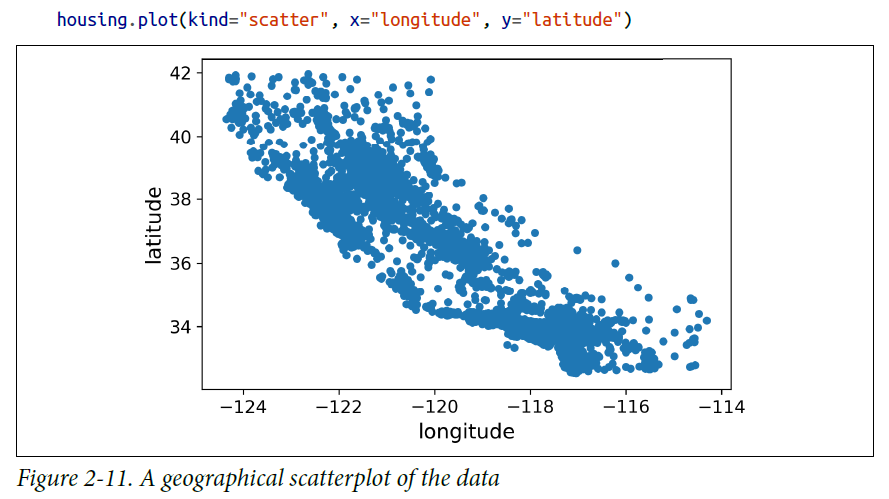

alpha parametresi verildiğinde: **housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)**
sonuç şöyle:

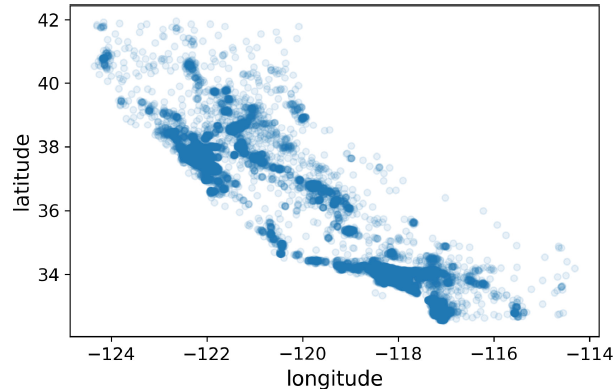

Bir diğer yöntem de hexbin tipli grafik çizdirmektir

#### Colormap değiştirme

https://stackoverflow.com/questions/20040597/matplotlib-change-colormap-after-the-fact

#### stil uygulama

In [336]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [337]:
plt.style.use('ggplot')

#### Legend

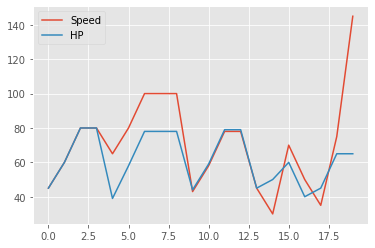

In [338]:
#aynı figurede birden fazla plot çizdin, legend verceksin
dfp["Speed"].head(20).plot()
dfp["HP"].head(20).plot()
plt.legend(["Speed","HP"]); #sırasını bilmen lazım

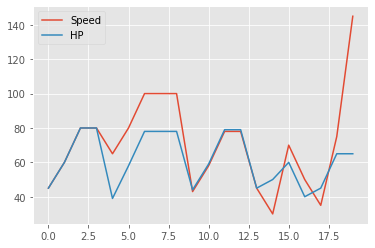

In [339]:
#veya
dfp["Speed"].head(20).plot(label="Speed")
dfp["HP"].head(20).plot(label="HP")
plt.legend();

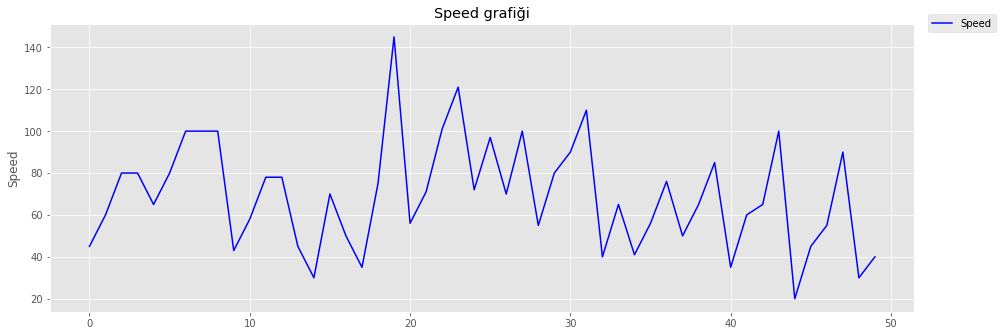

In [340]:
#legendı chart dışına alma
fig = plt.figure(figsize=(15,5))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(np.arange(50), dfp["Speed"].iloc[:50], c='b',label="Speed")
axes.set_ylabel('Speed')
axes.set_title('Speed grafiği')
axes.legend(bbox_to_anchor=(1.1, 1.05)) # bu satırla dışarı alıyoruz
plt.show();

#### subplot'un özelliklerine erişim ve bunları değiştirme(TASLAK)

ax nesnesinin metodlarını kullanırız.

In [341]:
#örneğin subplot içindeki chartların x eksenindeki labelların rotation'ını dğeiştirmek için
ax.tick_params(labelrotation=45) #veya ax.set_xticklabels(labels, rotation=45)

#### axis

(0.0, 1.0)

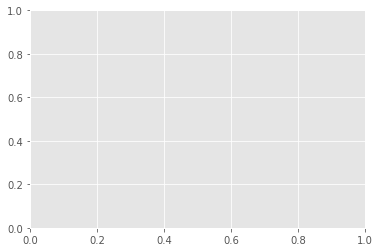

In [342]:
#gca ile current axis
plt.gca().set_ylim(0, 1)

#### yatay/dikey çizgi çekme

threshold için

In [345]:
# fig.axhline(y=..., color='red')

In [ ]:
# fig.axvline(x=...., color='red')

#### Şık görünen grafikler

In [ ]:
# plt.tight_layout()
# subplots_adjust()?????

https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf sayfasındaki şu cheatsheet de işinize ayrayacaktır.

## Seaborn

Seaborn kütüphanesi de çok sayıda grafik türü sunmkata, buraya önemli olduğunu düşündüklerimi aldım.

### barplot v.s

bunların matplotlibden çok büyük bir farkı bulunmuyor, ancak daha şık bir görsellik sunarlar.

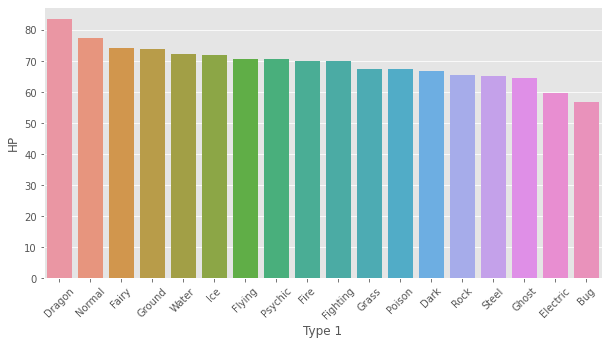

In [346]:
gruplu=dfp.groupby("Type 1")["HP"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=gruplu.index, y=gruplu.values)
plt.xticks(rotation= 45) #isimler uzun olursa horizontalalignment='right' da ekle
plt.xlabel('Type 1')
plt.ylabel('HP')
plt.show();

Kategorik veriler bazında adetleri saydırmak için <b>countplot</b> kullanılır.

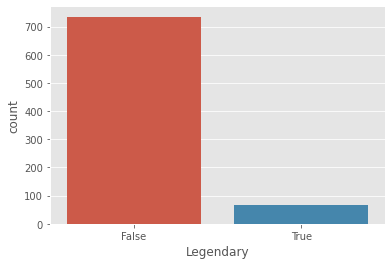

In [350]:
ax = sns.countplot(x=dfp['Legendary'],label="Count") #matplotlib'de groupby yapıp count almanın alternatifi

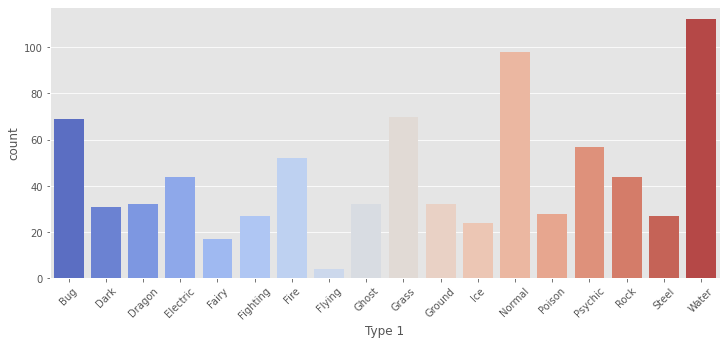

In [348]:
#count ettiğimiz gruplu alanı belli bi sıraya göre dizmek istersek order parametresini veririz
plt.figure(figsize=(12,5))
order = sorted(dfp['Type 1'].unique())
sns.countplot(x='Type 1',data=dfp,order = order,palette='coolwarm')
plt.xticks(rotation= 45);

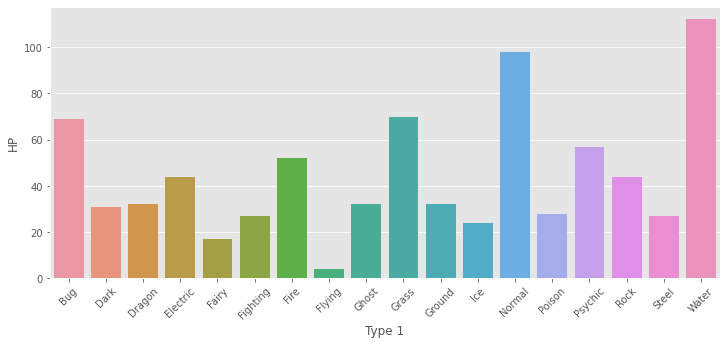

In [351]:
#bunu normal barplotla yapsaydık şöyle yapardık
gruplu=dfp.groupby("Type 1")["HP"].count() #HP önemli değil, herhangi bir kolon da olurdu

plt.figure(figsize=(12,5))
sns.barplot(x=gruplu.index, y=gruplu.values)
plt.xticks(rotation= 45) #isimler uzun olursa horizontalalignment='right' da ekle
plt.xlabel('Type 1')
plt.ylabel('HP')
plt.show();

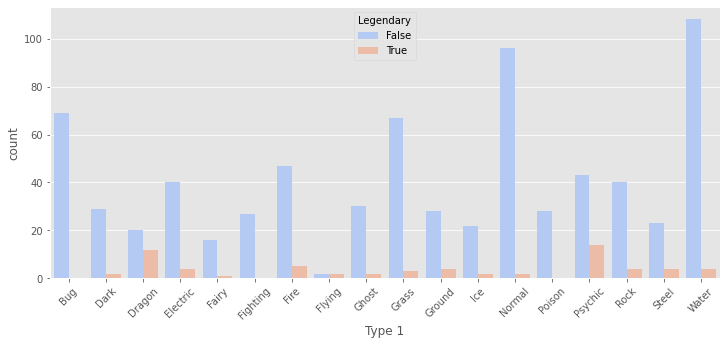

In [352]:
#countplotu bir de başka bir kolona göre de kıralım
plt.figure(figsize=(12,5))
order = sorted(dfp['Type 1'].unique())
sns.countplot(x='Type 1',data=dfp,order = order,palette='coolwarm', hue="Legendary")
plt.xticks(rotation= 45);

### scatterplot

<AxesSubplot:xlabel='Speed', ylabel='HP'>

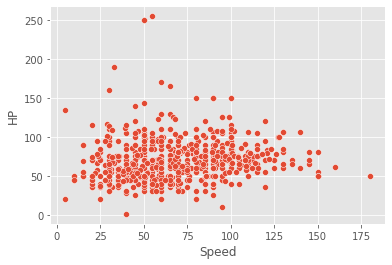

In [353]:
sns.scatterplot(x=dfp['Speed'],y=dfp['HP'])

Her ne kadar noktalar iki boyut üzerine çizilse de, renk değeri de kullanılarak sanal bir üçüncü boyut eklenebilir. Bunun için "hue" parametresi kullanılır.

Değişkenler arasındaki farklılığı vurgulamak için "style" parametresi kullanılarak markerlar da farklılaştırılabilir.

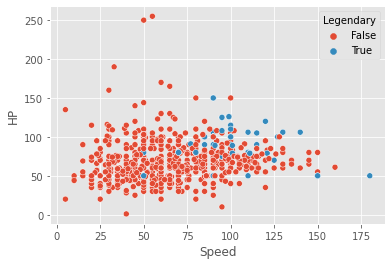

In [355]:
sns.scatterplot(x='Speed',y='HP',hue='Legendary',data=dfp);

### displot

Tek bir değişkenin dağılımına bakmanın en uygun yolu distplot kullanmaktadır.

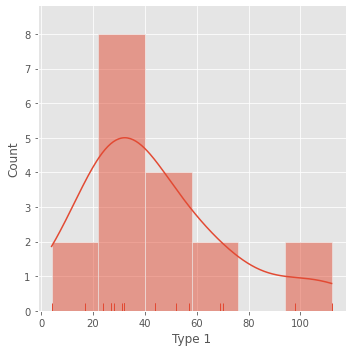

In [364]:
x=dfp["Type 1"].value_counts()
sns.displot(x,kde=True); #hist ve kde karışımını verir

### heatmap

bu grafik türü ile kolonlar arası korelasyonu çok güzel bir şekilde görürüz

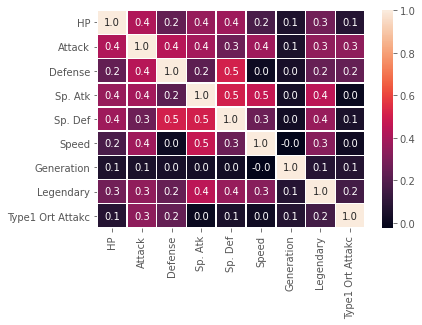

In [366]:
sns.heatmap(dfp.corr(),annot=True, linewidths=.5,fmt='.1f');

In [367]:
#örnek 2:
tip1legend = (dfp
            .groupby('Type 1')
            .filter(lambda x : len(x) > 50)
            .groupby(['Type 1', 'Legendary'])
            .size()
            .unstack()
           )
tip1legend

Legendary  False  True 
Type 1                 
Bug         69.0    NaN
Fire        47.0    5.0
Grass       67.0    3.0
Normal      96.0    2.0
Psychic     43.0   14.0
Water      108.0    4.0

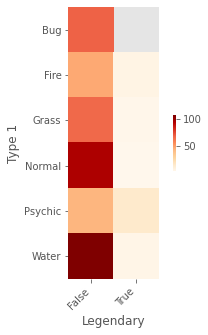

In [368]:
plt.figure(figsize=(5,5))
h = sns.heatmap(
    tip1legend, 
    square=True, 
    cbar_kws={'fraction' : 0.01}, 
    cmap='OrRd', 
    #linewidth=1
)

h.set_xticklabels(h.get_xticklabels(), rotation=45, horizontalalignment='right')
h.set_yticklabels(h.get_yticklabels(), rotation=0)
plt.show();

Pandas'ın corr metodunu numerik kolonlar üzerinde kullanıyoruz. Eğer elimizde kategorik verilerin olduğu bir alan olsaydı, bunlar için önce factorize metdounu çalıştırmak gerekirdi. <a href="https://stackoverflow.com/questions/48035381/correlation-among-multiple-categorical-variables-pandas">şu sayfada</a> güzel bir örnek bulunuyor.

### violinplot

Boxplota benzerler, aslında boxplot ile KDE grafiğinin bir karışımıdır diyebiliriz. Bir diğer artısı ise, çok tepeli KDE histogram verisini de KDE'den dolayı daha iyi gösterir. Bu grafik türüyle ilgili detay bilgiye <a href="https://blog.bioturing.com/2018/05/16/5-reasons-you-should-use-a-violin-graph/">buradan</a> ve <a href="https://towardsdatascience.com/violin-plots-explained-fb1d115e023d">buradan</a> ulaşabilirsiniz.

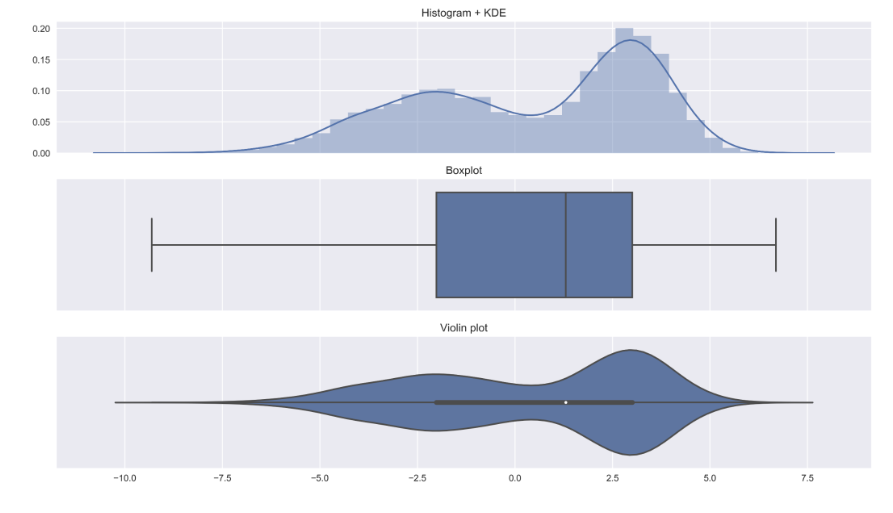

<Figure size 360x360 with 0 Axes>

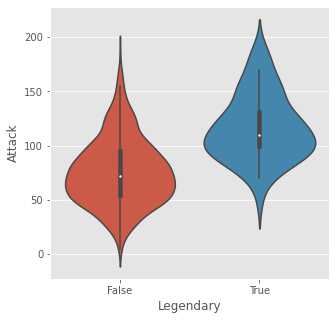

In [369]:
plt.figure(figsize=(5,5))
ax = sns.violinplot(x="Legendary", y="Attack", data=dfp)

<Figure size 1080x432 with 0 Axes>

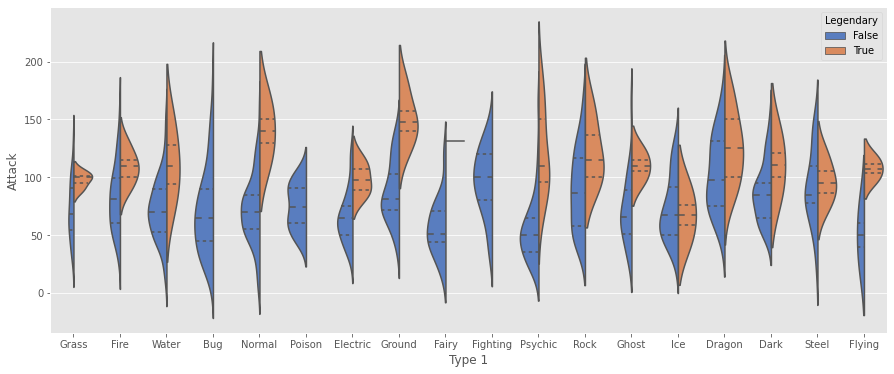

In [370]:
plt.figure(figsize=(15,6))
ax = sns.violinplot(x="Type 1", y="Attack", hue="Legendary", data=dfp, palette="muted", split=True, inner="quart") 
#inner parametre ile şekillerin içinde quartilleları gösteriyoruz, split parametresi ise Legendary değrlerini tek grafikte gösteriyor

Yorum: Medianlar Ice dışındakilerde birbirinden çok ayrı, dolayısıyla Ice dışındakilere giren birinin sınıfını tahmin etmek oldukça kolay.

### boxplot

Boxplot ile de benzer bir görüntü sağlanabilir. matplotlibin boxplotından daha şık bir görüntü sağlar.

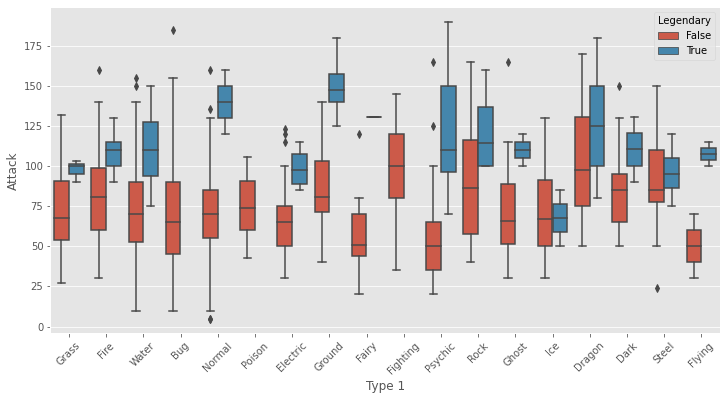

In [371]:
plt.figure(figsize=(12,6))
chart=sns.boxplot(x="Type 1", y="Attack", hue="Legendary", data=dfp) #kategorik bir feature kırılımı,üstelik Lengendary bazında
#plt.xticks(rotation=45)
chart.set_xticklabels(chart.get_xticklabels(),rotation=45) #isimler uzun olursa horizontalalignment='right' da ekle
plt.show();

### boxplot vs violinplot vs KDE

In [378]:
def plot_comparison(x, title):
    fig, ax = plt.subplots(3, 1, sharex=True)
    sns.distplot(x, ax=ax[0])
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1])
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2])
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=16)
    plt.show()

c:\users\volka\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\volka\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\volka\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments wit

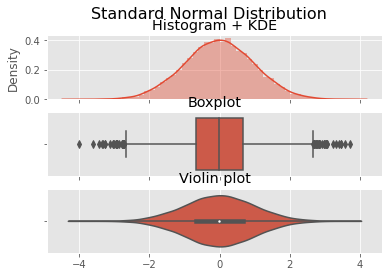

In [379]:
sample_gaussian = np.random.normal(size=10000)
plot_comparison(sample_gaussian, 'Standard Normal Distribution')

### jointgrid&jointplot

Hem tek hem iki değişken durumunda daha derin inceleme yapma amacıyla jointplot kullanırız. Detay bilgi için <a href="https://medium.com/@neuralnets/data-visualization-with-python-and-seaborn-part-5-scatter-plot-joint-plot-d7312164dc32">buraya</a> bakınız.

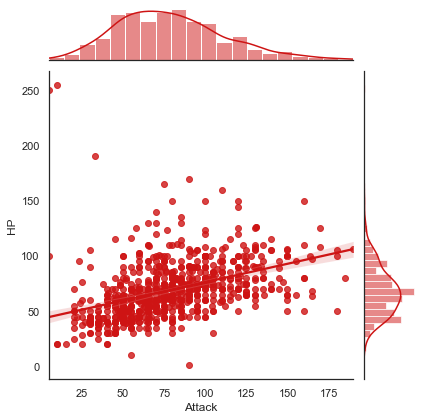

In [382]:
import scipy.stats as stats
sns.set(style="white")
sns.jointplot(x='Attack', y='HP', data=dfp, kind="reg", color="#ce1414"); #.annotate(stats.pearsonr)

### pairplot & pairgrid

matplotlibdeki scatterplot matrix'e benzer. iki dğeişkenin scatter grafiğini çizerken, aynı zamanda köşegenler üzerinde ilgili değişkenin histogramını da verir.

In [383]:
#çok karışık bir tabloyla karşılaşmayalım diye sadece belirli kolonları seçiyorum
dfx = dfp.loc[:,['Type 1','HP','Attack','Speed']]

pairplot kullanımı oldukça basittir.

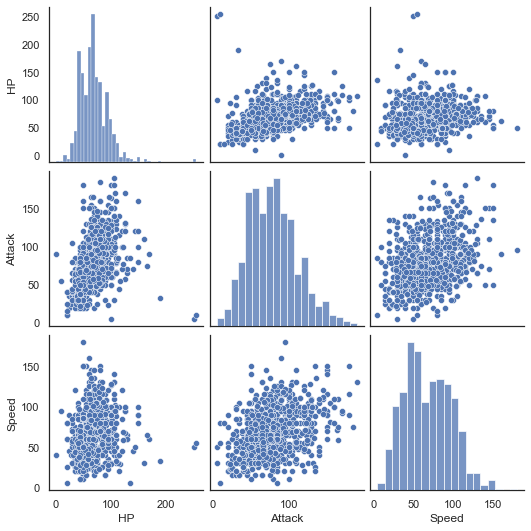

In [385]:
sns.pairplot(dfx);

ML çalışmalarında X'lerin y ile ilişkisine bakmak istersek x_vars ve y_vars parametrelerini kullanırız. Biz örnek olarak x'ler için HP ve Atak'ı alalım, Speed'e de y diyelim.

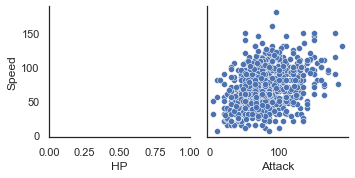

In [387]:
sns.pairplot(dfx,x_vars=dfx.iloc[:,1:3].columns,y_vars="Speed");

büyük rakamlar sözkonusu olduğunda 10 tabanında logaritma alınarak da incelemeler yapılabilmektedir.

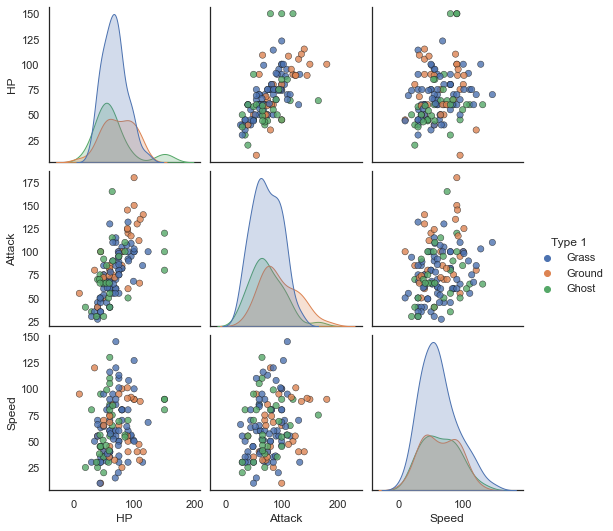

In [390]:
#çok kalabalık görünmesin diye G ve D ile başlayanları alıyorum
dfx.select_dtypes(np.number).apply(lambda x: np.log10(x))
sns.pairplot(dfx[dfx['Type 1'].str.startswith('G')], 
             hue='Type 1',plot_kws = {'alpha': 0.8, 's': 40, 'edgecolor': 'k'});

pairplotta default parametereler sözkonusu iken pairgridde ise nelerin çizileceğini biz söyleriz. Üç hedef bölge var: sol alttaki üçgen, sağ üstteki üçgen ve köşegen.

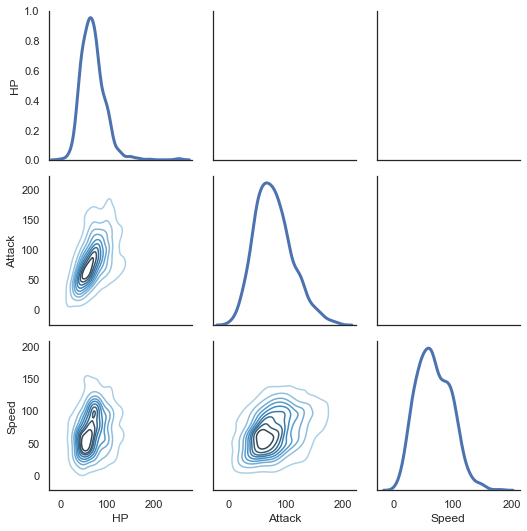

In [392]:
g = sns.PairGrid(dfx, diag_sharey=False);
g.map_lower(sns.kdeplot, cmap="Blues_d");
g.map_upper(plt.scatter);
g.map_diag(sns.kdeplot, lw=3);

Daha detaylı bir makale şurada bulunmakta: https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

### Catplot(Factorplot)

Bu grafik türü ile belirli bir feature göre gruplama yapılıyor. Böylece ayrı bir gruplama işlemine gerek kalmıyor. Default gruplama işlemi "ortalama"dır

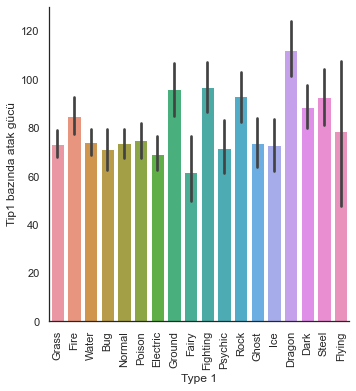

In [395]:
g=sns.catplot(x="Type 1",y="Attack",data=dfp,kind="bar"); #eski adı factorplot
g.set_ylabels("Tip1 bazında atak gücü");
plt.xticks(rotation= 90);

Kind=bar olduğunda errorbarlar da görünmekte. Bu sayede Flying tipinde varyansın da yüksek olduğunu görebiliyoruz.

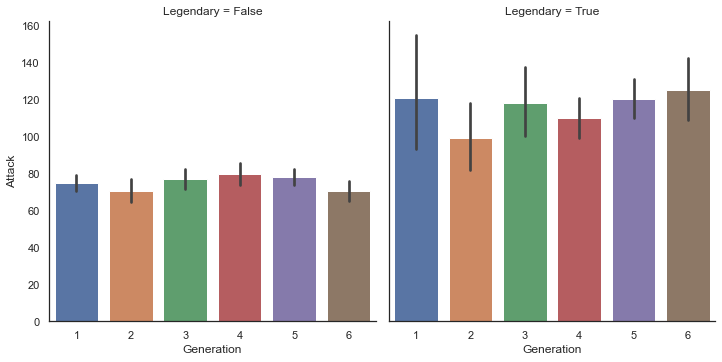

In [396]:
#bir featureda 2-3 değer varsa bunları ayrı ayrı kolonlarda gösterebiliriz
g = sns.catplot(x="Generation", y="Attack", col="Legendary", data=dfp, kind="bar")

### FacetGrid

Farklı boyutları farklı gridlerde göstermek istersek FacetGrid kullanabiliriz.

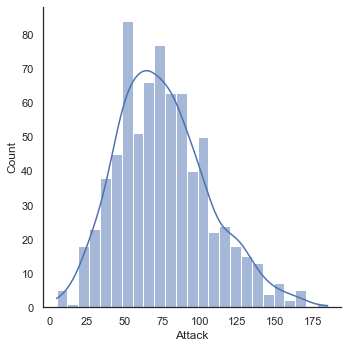

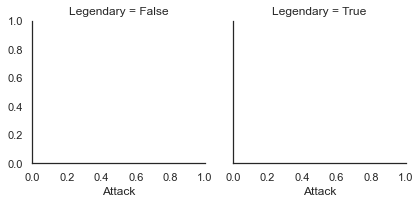

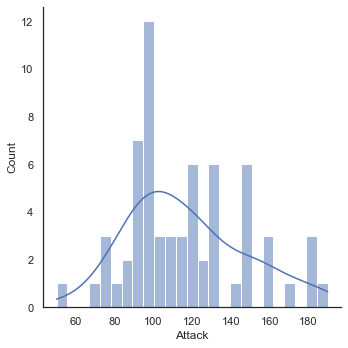

In [407]:
g=sns.FacetGrid(dfp,col="Legendary");
g.map(sns.displot,"Attack",bins=25,kde=True)

c:\users\volka\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\volka\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


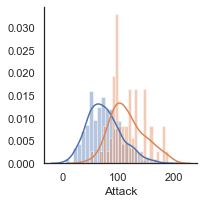

In [412]:
#col yerine hue dersek, farklı grafikler yerine aynı grafikte fakat farklı renkte gösterir
g=sns.FacetGrid(dfp,hue="Legendary")
g.map(sns.distplot, "Attack",bins=25)
plt.show()

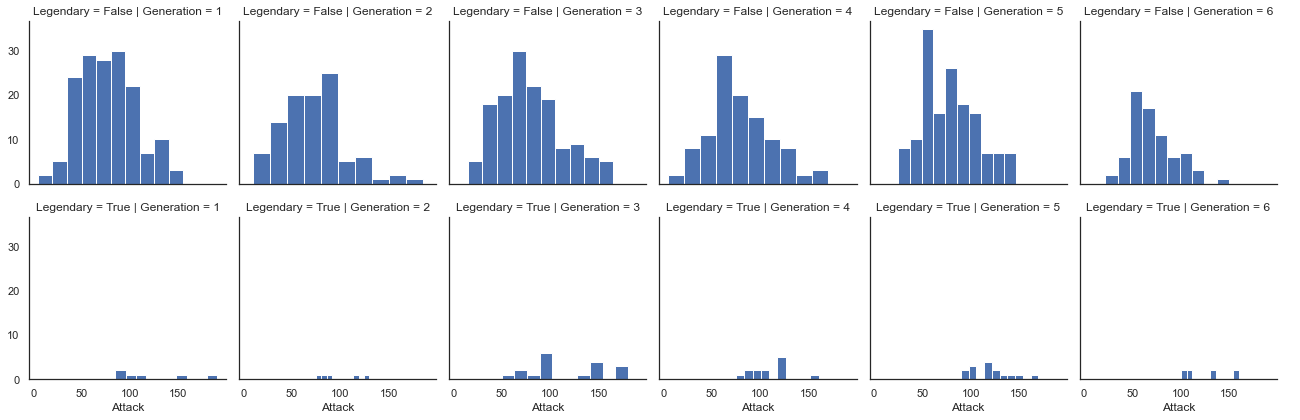

In [415]:
g=sns.FacetGrid(dfp,row="Legendary",col="Generation")
g.map(plt.hist, "Attack",bins=10)
g.add_legend();

### regplot ve lmplot

Bunların ikisi de regresyon çizgisi olan scatter plot çizerler. ancak regplot() sadece tek bir regresyon ilişkisi kurarken, lmplot arkaplanda facetgrid sayesinde kategorik bouyltara göre de kırılım yapabilir. Bunları özellikle ML çalışmaları sırasında bi regresyon analiz yaptıysanız kullanmak mantıklı olacaktır.

<AxesSubplot:xlabel='Attack', ylabel='Speed'>

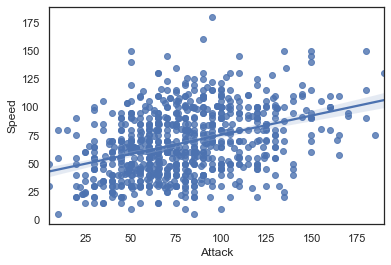

In [416]:
sns.regplot(x='Attack',y='Speed',data=dfp);

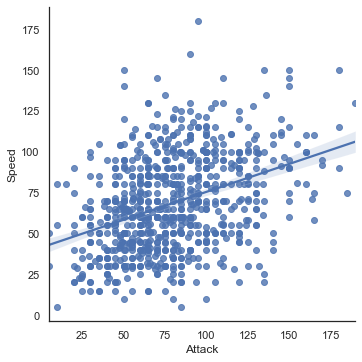

In [418]:
sns.lmplot(x='Attack',y='Speed',data=dfp);

İkisi de aslında aynı sonucu verdi ancak şeklen bir fark sözkonusu gibi. Bu farkın sebebi bence çok kritik değil ama merak edenler https://seaborn.pydata.org/tutorial/regression.html sayfasında "Controlling the size and shape of the plot" başlığında bulabilir. Biz şimdi lmplotun FacetGrid sayesindeki daha zengin kulanımına bakalım.

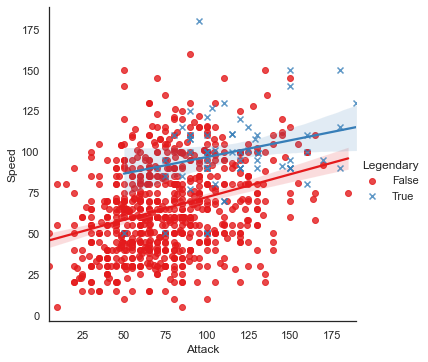

In [420]:
sns.lmplot(x='Attack',y='Speed',hue='Legendary',data=dfp, markers=["o", "x"], palette="Set1");

## Diğer görselleştirme kütüphaneleri 

Matplotlib ve Seaborn dışında kullanılan başka kütüphaneler de var. Plotly ve Bokeh gibi. Bunları detaylı incelemeyi size bırakıyorum. Aşağıda sadece bir iki ufak örnek bulacaksınız.

In [ ]:
#pip install plotly #önce kurmanız gerekiyor

In [421]:
#Plotly'nin güzelliği üzerine gelindiğinde çeşitli bilgiler sunması
import plotly.graph_objs as go
seri=dfp["Type 1"].value_counts()
data = {
  'x': seri.index,
  'y': seri.values,
  'name': 'citation',
  'type': 'bar'
};

fig = go.Figure(data = data)
fig.show()

In [422]:
#pip install wordcloud 

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

(-0.5, 511.5, 383.5, -0.5)

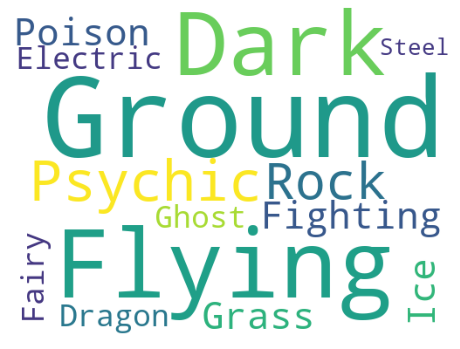

In [423]:
from wordcloud import WordCloud

tip2ler = dfp["Type 2"][(dfp["Type 1"]=="Water") & (dfp["Type 2"].notna())].values
#print(tip2ler)
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(tip2ler))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()
#her çalışıtırmada renkler ve konumlar dğeişiyor ama büyüklükler dğeişmez

In [4]:
#plotlyde animasyonlu grafikler de çizdirebiliyorsunuz
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

Bu grafikler medium giib platformalrda veya websitelerinde de interaktif bir şekilde paylaşılabiliyor. Nasıl yapıldığını görmek için <a href="https://towardsdatascience.com/how-to-create-a-plotly-visualization-and-embed-it-on-websites-517c1a78568b">tıklayınız</a>

## Grafik seçimi

Üç aşağı beş yukarı, hangi grafik türünü ne zaman kullanmanız gerektiğini anlamış olmalısınız. Ben yine de camiada çok kullanılan bir yönlendirici <a href='https://extremepresentation.typepad.com/files/choosing-a-good-chart-09.pdf'>şemayı </a> sizle paylaşma isterim.

# Data nasıl incelenir, nereden başlanır

Buraya kadar veri bilimine ait kaydadeğer miktarda bilgi edinmiş oldunuz. Güzel, ancak bunları elinizdeki veri setine nasıl uygulayacağınız konusunda kafanız karışmış olabilir. İşte bunları hangi sırayla uygulayacağınıza dair yöntemler **(`EDA ve preprocessing`)** bulunmaktadır. Bunlara ait detaylı bilgiyi <a href="https://mvolkanyurtseven.medium.com/makine-%C3%B6%C4%9Frenimi-felsefesi-5-78cd290b46f2">şurdaki</a> medium gönderismde bulabilirsiniz.